In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import log_loss
sns.set()
sns.set_style('whitegrid')

from scipy import stats

import statsmodels.api as sm

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [289]:
df = pd.read_csv('Trial_99_Cleaned')

In [290]:
df.head()

,Start_Date,End_Date,Last_Name,Version_Duration,Sleep_Quality,Overall_Experience,Focus_Atten_Concen,Memory,Drive_Passion_Motivation,Physical_Energy,...,Verbal_Fluency_Word_Recall,Creativity_Insight,InterpersonalCapability_Empathy,Emotional_Stability,Euphoria_Joy_Happiness,Estimated_Effect_Duration,Upper_Effect_Duration,Lower_Effect_Duration,Current_User_Comparison,User_Status
0,2017-11-14 14:51:00,2017-11-14 14:52:00,User1,1 weeks,OK,Good,Improved,Improved,Improved,Improved,...,No effect,No effect,No effect,No effect,No effect,4-8,8.0,4.0,I am not a XNootropic user,Non-user
1,2017-11-08 14:51:00,2017-11-08 14:54:00,User1,1 day,OK,Good,Improved,No effect,No effect,Improved,...,No effect,No effect,No effect,Improved,Improved,4-8,8.0,4.0,I am not a XNootropic user,Non-user
2,2017-11-17 05:50:00,2017-11-17 05:57:00,User2,1 weeks,OK,Not good,Improved,Improved,Less good,Less good,...,Improved,Improved,Improved,No effect,No effect,8+,12.0,8.0,This is less good than XNootropic,XNootropic User
3,2017-11-14 13:40:00,2017-11-14 13:48:00,User2,1 day,OK,Excellent,Improved,Improved,Improved,Improved,...,Improved,Improved,No effect,No effect,No effect,8+,12.0,8.0,This is better than XNootropic,XNootropic User
4,2017-11-20 11:05:00,2017-11-20 11:10:00,User3,2 weeks,OK,Good,Improved,No effect,Improved,Improved,...,No effect,No effect,No effect,No effect,Improved,4-8,8.0,4.0,This is better than XNootropic,XNootropic User


In [138]:
df.isnull().any().sum()

17

In [291]:
rating = {'Excellent': 'High',
          'Good':'High',
          'No effect': 'Low',
          'Not good':'Low',
          'Awful': "Low"}
df['Overall_Exp_Rating'] = df['Overall_Experience'].map(rating)

In [292]:
df['Overall_Exp_Rating']=df['Overall_Exp_Rating'].map({'High': 1, 'Low':0})

In [11]:
df.head()

,Start_Date,End_Date,Last_Name,Version_Duration,Sleep_Quality,Overall_Experience,Focus_Atten_Concen,Memory,Drive_Passion_Motivation,Physical_Energy,...,Creativity_Insight,InterpersonalCapability_Empathy,Emotional_Stability,Euphoria_Joy_Happiness,Estimated_Effect_Duration,Upper_Effect_Duration,Lower_Effect_Duration,Current_User_Comparison,User_Status,Overall_Exp_Rating
0,2017-11-14 14:51:00,2017-11-14 14:52:00,User1,1 weeks,OK,Good,Improved,Improved,Improved,Improved,...,No effect,No effect,No effect,No effect,4-8,8.0,4.0,I am not a XNootropic user,Non-user,1
1,2017-11-08 14:51:00,2017-11-08 14:54:00,User1,1 day,OK,Good,Improved,No effect,No effect,Improved,...,No effect,No effect,Improved,Improved,4-8,8.0,4.0,I am not a XNootropic user,Non-user,1
2,2017-11-17 05:50:00,2017-11-17 05:57:00,User2,1 weeks,OK,Not good,Improved,Improved,Less good,Less good,...,Improved,Improved,No effect,No effect,8+,12.0,8.0,This is less good than XNootropic,XNootropic User,0
3,2017-11-14 13:40:00,2017-11-14 13:48:00,User2,1 day,OK,Excellent,Improved,Improved,Improved,Improved,...,Improved,No effect,No effect,No effect,8+,12.0,8.0,This is better than XNootropic,XNootropic User,1
4,2017-11-20 11:05:00,2017-11-20 11:10:00,User3,2 weeks,OK,Good,Improved,No effect,Improved,Improved,...,No effect,No effect,No effect,Improved,4-8,8.0,4.0,This is better than XNootropic,XNootropic User,1


## Logloss: measures the performance of a classification model
input = is the probability value between 0 and 1. You want to minimize the logloss as much as possible. A perfect model would have a logloss value of zero. 

Used as a evaluation metric. 

Logloss quantifies accuracy of a classifier by penalizing false classification. Minimizing logloss is basically maximizing accuracy of the classifier. 

In [7]:
features = [3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 20]

In [9]:
msk = np.random.rand(len(df)) < 0.8
features = [3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21]
X_train = df[msk].iloc[:,features]
X_test = df[~msk].iloc[:,features]
y_train = df[msk].iloc[:,22]
y_test = df[~msk].iloc[:,22]
print(log_loss(y_test,np.ones(len(y_test))*y_train.mean()))


0.314562846807


In [10]:
#encoding ordinal variables 
X_train_ordinal = X_train.values
X_test_ordinal = X_test.values
les = []
l = LogisticRegression()
r = RandomForestClassifier(n_estimators=25,max_depth=10)
for i in range(X_train_ordinal.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(df.iloc[:,features].iloc[:, i])
    les.append(le)
    X_train_ordinal[:, i] = le.transform(X_train_ordinal[:, i])
    X_test_ordinal[:, i] = le.transform(X_test_ordinal[:, i])
l.fit(X_train_ordinal,y_train)
y_pred = l.predict_proba(X_test_ordinal)
print(log_loss(y_test,y_pred))
r.fit(X_train_ordinal,y_train)
y_pred = r.predict_proba(X_test_ordinal)
print(log_loss(y_test,y_pred))

0.288201761136


/Users/macbook/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))
/Users/macbook/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:259: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  return aux[:-1][aux[1:] == aux[:-1]]


0.0935168624951


In [11]:
#dummy variables/ one hot encoding
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train_ordinal)
X_train_one_hot = enc.transform(X_train_ordinal)
X_test_one_hot = enc.transform(X_test_ordinal)
l.fit(X_train_one_hot,y_train)
y_pred = l.predict_proba(X_test_one_hot)
print(log_loss(y_test,y_pred))
r.fit(X_train_one_hot,y_train)
y_pred = r.predict_proba(X_test_one_hot)
print(log_loss(y_test,y_pred))
print(X_train_one_hot.shape)

0.115623973796
0.0909615047488
(81, 55)


In [12]:
#df['Sleep_Quality'].astype('category', ordered=True, categories=ordered_sleep).cat.codes

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
f = [  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 20]

In [16]:
for col in df[f]:
    df[col] = le.fit_transform(df[col].astype('str'))

In [17]:
df_train = df[f]
df_train.head()

,Sleep_Quality,Focus_Atten_Concen,Memory,Drive_Passion_Motivation,Physical_Energy,Capacity_Productivity,Decisiveness,Verbal_Fluency_Word_Recall,Creativity_Insight,InterpersonalCapability_Empathy,Emotional_Stability,Euhphoria_Joy_Happiness,Estimated_Effect_Duration,Current_User_Comparison
0,1,0,0,0,0,0,0,2,1,2,2,2,1,0
1,1,0,2,2,0,0,2,2,1,2,0,0,1,0
2,1,0,0,1,1,1,0,0,0,0,2,2,2,3
3,1,0,0,0,0,0,0,0,0,2,2,2,2,2
4,1,0,2,0,0,0,2,2,1,2,2,0,1,2


In [18]:
mapping = {'Excellent': 3, 'OK':2, 'Poor':1}

In [293]:
df['Sleep_Quality'] = df['Sleep_Quality'].astype('category')
df['Sleep_Quality'] = df['Sleep_Quality'].cat.reorder_categories(['Poor', 'OK','Excellent'], ordered=True)
df['Sleep_Quality'] = df['Sleep_Quality'].cat.codes

In [294]:
feat =  [ 6,  7,  8,  9, 10, 11, 12, 14, 15, 16] #creativity insight only has two responses, so we have to skip it

In [295]:
for col in df[feat]:
    df[col] = df[col].astype('category')
    df[col]= df[col].cat.reorder_categories(['Less good', 'No effect', 'Improved'], ordered=True)
    df[col] = df[col].cat.codes

In [296]:
df['Creativity_Insight'].value_counts()

Improved     51
No effect    50
Name: Creativity_Insight, dtype: int64

In [297]:
df['Creativity_Insight'] = df['Creativity_Insight'].astype('category')
df['Creativity_Insight'] = df['Creativity_Insight'].cat.reorder_categories(['No effect', 'Improved'], ordered=True)
df['Creativity_Insight'] = df['Creativity_Insight'].cat.codes

In [298]:
df['Estimated_Effect_Duration'] = df['Estimated_Effect_Duration'].astype('category')
df['Estimated_Effect_Duration'] = df['Estimated_Effect_Duration'].cat.reorder_categories(['<2', '2-4', '4-8','8+'], ordered=True)
df['Estimated_Effect_Duration'] = df['Estimated_Effect_Duration'].cat.codes

In [299]:
df['Overall_Experience'] = df['Overall_Experience'].astype('category')
df['Overall_Experience'] = df['Overall_Experience'].cat.reorder_categories(['Awful','Not good','No effect','Good', 'Excellent'], ordered=True)
df['Overall_Experience'] = df['Overall_Experience'].cat.codes

In [300]:
df['User_Status'] = df['User_Status'].astype('category')
df['User_Status'] = df['User_Status'].cat.reorder_categories(['Non-user', 'XNootropic User'], ordered=True)
df['User_Status'] = df['User_Status'].cat.codes

In [301]:
features = [  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 21]

In [303]:
df[features].head()

,Sleep_Quality,Focus_Atten_Concen,Memory,Drive_Passion_Motivation,Physical_Energy,Capacity_Productivity,Decisiveness,Verbal_Fluency_Word_Recall,Creativity_Insight,InterpersonalCapability_Empathy,Emotional_Stability,Euphoria_Joy_Happiness,Estimated_Effect_Duration,User_Status
0,1,2,2,2,2,2,2,1,0,1,1,1,2,0
1,1,2,1,1,2,2,1,1,0,1,2,2,2,0
2,1,2,2,0,0,0,2,2,1,2,1,1,3,1
3,1,2,2,2,2,2,2,2,1,1,1,1,3,1
4,1,2,1,2,2,2,1,1,0,1,1,2,2,1


In [603]:
msk = np.random.rand(len(df)) < 0.8
features = [4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 21]
X_train = df[msk].iloc[:,features]
X_test = df[~msk].iloc[:,features]
y_train = df[msk].iloc[:,22]
y_test = df[~msk].iloc[:,22]

print(log_loss(y_test,np.ones(len(y_test))*y_train.mean()))


0.244703177182


In [ ]:
#encoding ordinal variables 
X_train_ordinal = X_train.values
X_test_ordinal = X_test.values
les = []
l = LogisticRegression()
r = RandomForestClassifier(n_estimators=25,max_depth=10)
for i in range(X_train_ordinal.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(df.iloc[:,features].iloc[:, i])
    les.append(le)
    X_train_ordinal[:, i] = le.transform(X_train_ordinal[:, i])
    X_test_ordinal[:, i] = le.transform(X_test_ordinal[:, i])
l.fit(X_train_ordinal,y_train)
y_pred = l.predict_proba(X_test_ordinal)
print(log_loss(y_test,y_pred))
r.fit(X_train_ordinal,y_train)
y_pred = r.predict_proba(X_test_ordinal)
print(log_loss(y_test,y_pred))

In [313]:
l = LogisticRegression()
r  = RandomForestClassifier(n_estimators=25, max_depth=10)


l.fit(X_train, y_train)
y_pred = l.predict_proba(X_test)
print (log_loss(y_test, y_pred))

0.165626970426


In [314]:
r.fit(X_train, y_train)
y_pred = r.predict_proba(X_test)
print (log_loss(y_test, y_pred))

0.100235590986


In [315]:
from sklearn.feature_selection import RFE

In [932]:
f = [4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 21, 22]


In [325]:
array = df[f].values

In [720]:
X = array[:, 0:14]
Y = array[:, 14]

array([[1, 2, 2, ..., 2, 0, 1],
       [1, 2, 1, ..., 2, 0, 1],
       [1, 2, 2, ..., 3, 1, 0],
       ..., 
       [1, 2, 2, ..., 2, 0, 1],
       [0, 2, 2, ..., 2, 0, 1],
       [0, 0, 0, ..., 2, 0, 1]])

In [851]:
#feature extraction

model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X,Y)
print ('Num Features: {}'.format(fit.n_features_))
print ('Selected Features: {}'.format(fit.support_))
print ('Feature Ranking: {}'.format(fit.ranking_))

Num Features: 5
Selected Features: [False False  True  True  True False False False False  True  True False
 False False]
Feature Ranking: [ 4 10  1  1  1  6  9  7  5  1  1  3  2  8]


In [406]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold


def cv_score (clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x):
        clf.fit(x[train], y[train]) #fit
        result += score_func(clf.predict(x[test]), y[test])
    return result / nfold #average
    


In [619]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=.30)
print(log_loss(ytest,np.ones(len(ytest))*ytrain.mean()))


0.317955464743


In [731]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)
print(accuracy_score(model.predict(Xtest), ytest))

0.903225806452


In [431]:
Cs = [0.001, 0.1, 1, 10, 100]

best_score = 0
for C in Cs:
    logreg = LogisticRegression(C=C)
    score = cv_score(logreg, Xtrain, ytrain)
    print ('c:', C, 'score:', score)
    
    if score > best_score:
        best_score = score
        best_C = C
print best_C, best_score

('c:', 0.001, 'score:', 0.89416666666666667)
('c:', 0.1, 'score:', 0.89416666666666667)
('c:', 1, 'score:', 0.90749999999999997)
('c:', 10, 'score:', 0.90666666666666662)
('c:', 100, 'score:', 0.85500000000000009)
1 0.9075


In [428]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()
params = {'C': [0.001, 0.1, 1, 10, 100] }
clf_grid = GridSearchCV(clf, param_grid = params)
clf_grid.fit(Xtrain, ytrain)

print ('C with no scoring method: {}'.format(clf_grid.best_params_['C']))
print ('Accuracy: {}'. format(accuracy_score(clf_grid.predict(Xtest), ytest)))

C with no scoring method: 10
Accuracy: 0.923076923077


In [628]:
model = LogisticRegression(C=10)
rfe = RFE(model, 5)
fit = rfe.fit(X,Y)
print ('Num Features: {}'.format(fit.n_features_))
print ('Selected Features: {}'.format(fit.support_))
print ('Feature Ranking: {}'.format(fit.ranking_))

Num Features: 5
Selected Features: [ True False  True False  True False False False False  True False False
 False  True]
Feature Ranking: [ 1  5  1  2  1  6  9 10  8  1  7  4  3  1]


In [670]:
important_feat = []
for ind, val in enumerate(fit.ranking_):
    if val == 1:
        important_feat.append(ind)
important_feat.append(14)
important_feat

[0, 2, 4, 9, 13, 14]

In [735]:
arr = (df[f][important_feat]).values

xfeat = arr[:,0:4]
yfeat = arr[:,5]
xtr, xte, ytr, yte = train_test_split(xfeat, yfeat)

In [740]:
model = LogisticRegression(C=10)
model.fit(xtr, ytr)
print(accuracy_score(model.predict(xte), yte))
y_pred = model.predict(xte)
print (classification_report(yte, y_pred))

0.923076923077
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         3
          1       0.92      1.00      0.96        23

avg / total       0.93      0.92      0.91        26



In [615]:
model = LogisticRegression(C=10)
model.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print(model.score(Xtest, ytest))
print (classification_report(ytest, y_pred))

0.903225806452
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       0.93      1.00      0.96        27

avg / total       0.94      0.94      0.93        31



In [616]:
model = LogisticRegression(C=1)
model.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print(model.score(Xtest, ytest))
print (classification_report(ytest, y_pred))

0.903225806452
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       0.93      1.00      0.96        27

avg / total       0.94      0.94      0.93        31



In [585]:
from sklearn.ensemble import ExtraTreesClassifier
#fature extraction
model = ExtraTreesClassifier()
model.fit(X,Y)
print (model.feature_importances_)

[ 0.03337474  0.0551188   0.01947888  0.1226479   0.2804025   0.05629805
  0.03265298  0.05560031  0.03751364  0.01382665  0.09548402  0.05626454
  0.1229569   0.01838011]


In [382]:
df[f].columns

Index([u'Sleep_Quality', u'Focus_Atten_Concen', u'Memory',
       u'Drive_Passion_Motivation', u'Physical_Energy',
       u'Capacity_Productivity', u'Decisiveness',
       u'Verbal_Fluency_Word_Recall', u'Creativity_Insight',
       u'InterpersonalCapability_Empathy', u'Emotional_Stability',
       u'Euphoria_Joy_Happiness', u'Estimated_Effect_Duration', u'User_Status',
       u'Overall_Exp_Rating'],
      dtype='object')

In [440]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,Y)
print (clf.feature_importances_)

[ 0.05414989  0.04917061  0.01110204  0.13329236  0.33238444  0.05127408
  0.04291261  0.044173    0.02785005  0.00593548  0.09042286  0.06738658
  0.08595804  0.00398797]


In [934]:
rf = RandomForestClassifier()
rf.fit(X, y)
rf.score(X,y)

0.99019607843137258

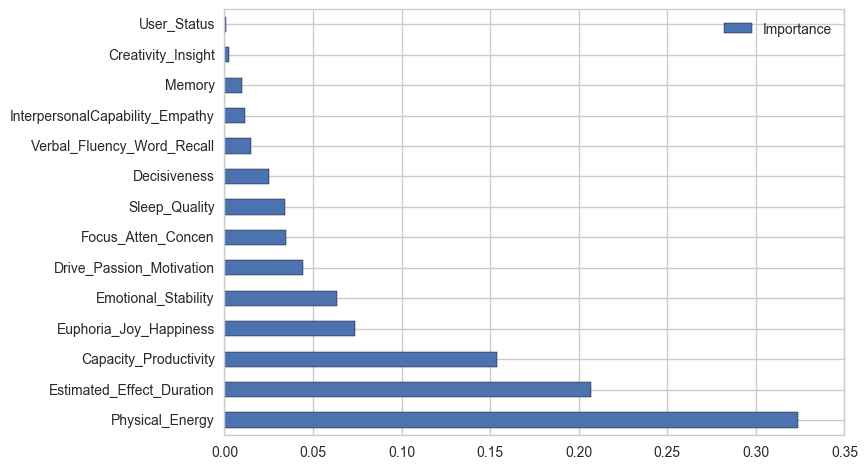

In [935]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=(df[f].iloc[:,:14].columns),
                                   columns=(['Importance'])).sort_values('Importance', ascending=False)
feature_importances.plot(kind='barh')

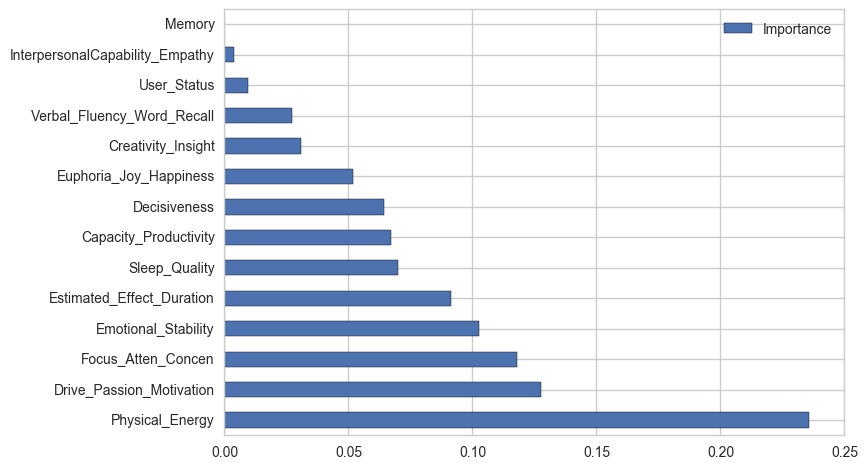

In [849]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns,
                                   columns=(['Importance'])).sort_values('Importance', ascending=False)

feature_importances.plot(kind='barh')

In [933]:
data = df[f] # trying to see if we can keep column names
y = data.Overall_Exp_Rating
X = data.drop(['Overall_Exp_Rating'], axis=1)



#X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.30)

                                    Score
Name                                     
Physical_Energy                  0.389286
Focus_Atten_Concen               0.161226
Estimated_Effect_Duration        0.098286
Creativity_Insight               0.072043
Sleep_Quality                    0.055212
Euphoria_Joy_Happiness           0.055007
Emotional_Stability              0.053911
User_Status                      0.039157
Decisiveness                     0.031578
Capacity_Productivity            0.026011
Drive_Passion_Motivation         0.009202
InterpersonalCapability_Empathy  0.007480
Memory                           0.000896
Verbal_Fluency_Word_Recall       0.000704


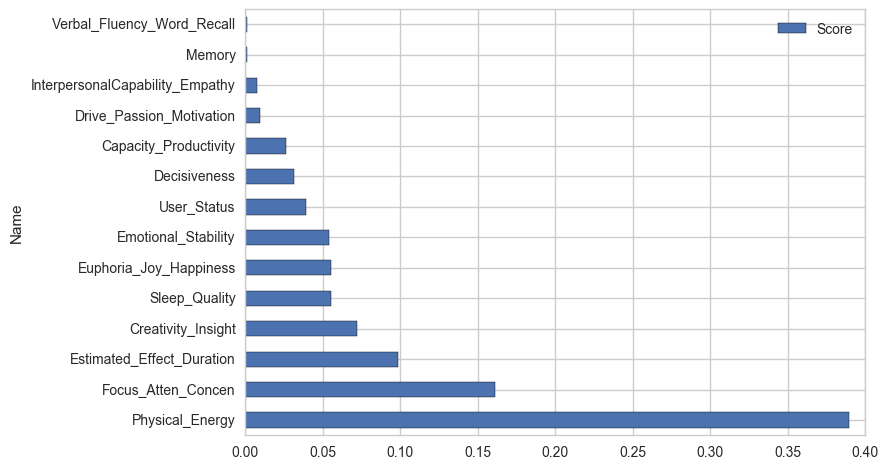

In [937]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test,y_test)
headers= ['Name', 'Score']
values = sorted(zip(X_train.columns, rf.feature_importances_), key=lambda x:x[1]* -1)
df_2 = pd.DataFrame(data=values, columns=headers).set_index('Name')
print (df_2)
df_2.plot(kind='barh')

                                    Score
Name                                     
Physical_Energy                  0.562143
Verbal_Fluency_Word_Recall       0.092371
Euphoria_Joy_Happiness           0.061614
Focus_Atten_Concen               0.053269
Estimated_Effect_Duration        0.046802
Sleep_Quality                    0.033768
Emotional_Stability              0.029611
Decisiveness                     0.026991
InterpersonalCapability_Empathy  0.023719
Drive_Passion_Motivation         0.021883
Capacity_Productivity            0.018534
Memory                           0.010031
Creativity_Insight               0.009713
User_Status                      0.009551


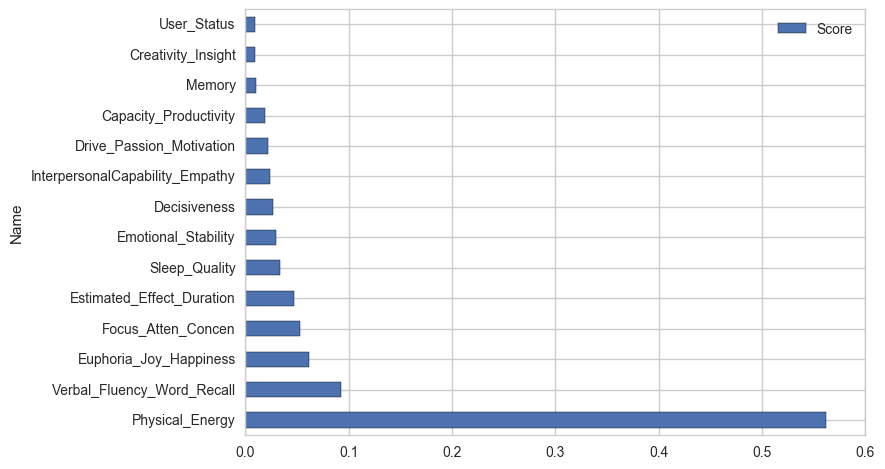

In [915]:
#training the model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=2, n_estimators=1000)
model = rf.fit(X_train, y_train)

headers= ['Name', 'Score']
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x:x[1]* -1)
df_2 = pd.DataFrame(data=values, columns=headers).set_index('Name')
print (df_2)
df_2.plot(kind='barh')

In [860]:
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X,Y)
print ('Num Features: {}'.format(fit.n_features_))
print ('Selected Features: {}'.format(fit.support_))
print ('Feature Ranking: {}'.format(fit.ranking_))
headers= ['Name', 'Score']
values = sorted(zip(X_train.columns, fit.ranking_), key=lambda x:x[1]* 1)
df_2 = pd.DataFrame(data=values, columns=headers).set_index('Name')
df_2

Num Features: 5
Selected Features: [False False  True  True  True False False False False  True  True False
 False False]
Feature Ranking: [ 4 10  1  1  1  6  9  7  5  1  1  3  2  8]


,Score
Name,
Memory,1
Drive_Passion_Motivation,1
Physical_Energy,1
InterpersonalCapability_Empathy,1
Emotional_Stability,1
Estimated_Effect_Duration,2
Euphoria_Joy_Happiness,3
Sleep_Quality,4
Creativity_Insight,5


                                    Score
Name                                     
Physical_Energy                  0.195156
Focus_Atten_Concen               0.150648
Euphoria_Joy_Happiness           0.096912
Capacity_Productivity            0.089364
Drive_Passion_Motivation         0.088601
Decisiveness                     0.082843
Estimated_Effect_Duration        0.078138
Emotional_Stability              0.058659
Sleep_Quality                    0.050428
InterpersonalCapability_Empathy  0.050255
Verbal_Fluency_Word_Recall       0.024881
Memory                           0.017735
Creativity_Insight               0.011261
User_Status                      0.005120


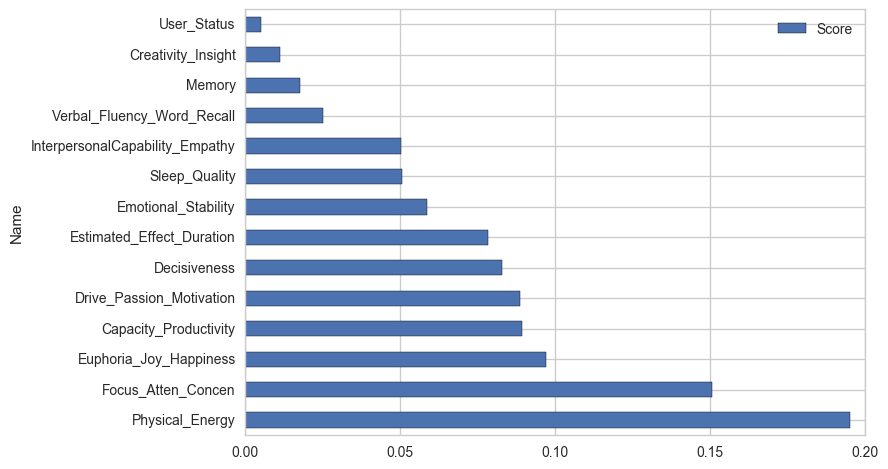

In [914]:
#fature extraction
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
headers= ['Name', 'Score']
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x:x[1]* -1)
df_2 = pd.DataFrame(data=values, columns=headers).set_index('Name')
print (df_2)
df_2.plot(kind='barh')

Feature Ranking:
1. feature 4 (0.313581)
2. feature 12 (0.091774)
3. feature 10 (0.090390)
4. feature 11 (0.087827)
5. feature 3 (0.080342)
6. feature 5 (0.067581)
7. feature 1 (0.056337)
8. feature 0 (0.046305)
9. feature 6 (0.045549)
10. feature 7 (0.044080)
11. feature 8 (0.024403)
12. feature 13 (0.021482)
13. feature 9 (0.015239)
14. feature 2 (0.015111)


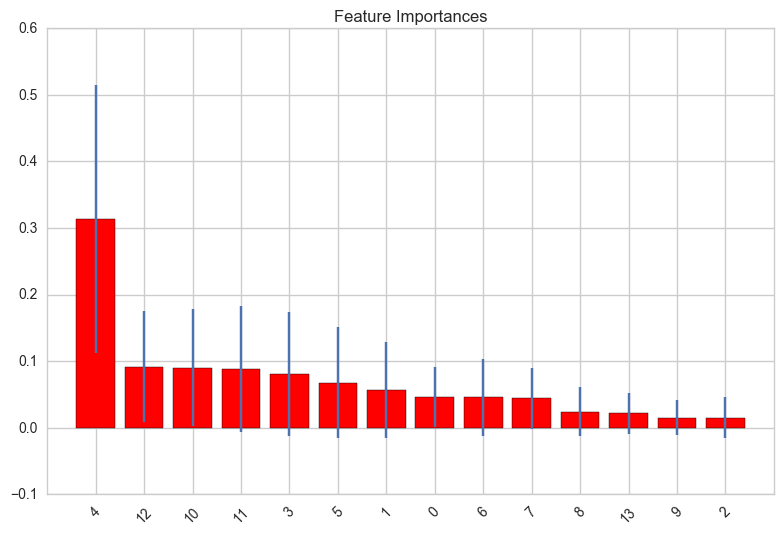

In [913]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X,y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

print ('Feature Ranking:')
for f in range(X.shape[1]):
    print ("%d. feature %d (%f)" %(f + 1, indices[f], importances[indices[f]]))
    
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color='r', yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), indices, rotation=45)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [864]:
from sklearn.svm import SVR
estimator = SVR(kernel='linear')
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X_train, y_train)
headers= ['Name', 'Score']
values = sorted(zip(X_train.columns, selector.ranking_), key=lambda x:x[1]* 1)
df_2 = pd.DataFrame(data=values, columns=headers).set_index('Name')
df_2

,Score
Name,
Focus_Atten_Concen,1
Drive_Passion_Motivation,1
Physical_Energy,1
Verbal_Fluency_Word_Recall,1
Emotional_Stability,1
InterpersonalCapability_Empathy,2
Euphoria_Joy_Happiness,3
Decisiveness,4
Estimated_Effect_Duration,5


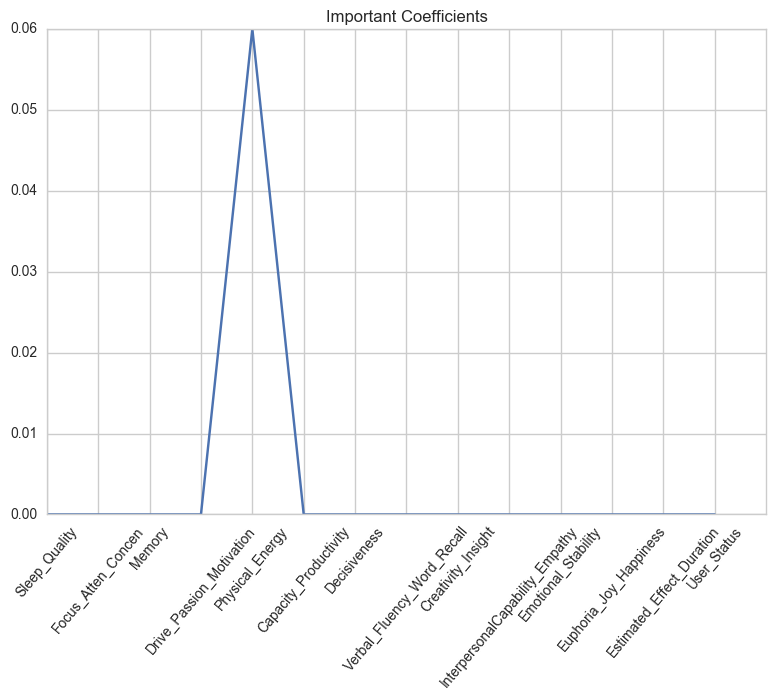

In [903]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
names = X_train.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_




fig, ax1 = plt.subplots(1,1)

plt.plot(range(len(names)), lasso_coef, )
plt.tight_layout()
plt.title('Important Coefficients')
ax1.set_xticks(range(len(names)))
ax1.set_xticklabels(names, minor=False, rotation=50)

In [608]:
clf = RandomForestClassifier()
clf.fit(Xtrain,ytrain)
y_pred = clf.predict(Xtest)
print(clf.score(Xtest, ytest))
print (classification_report(ytest, y_pred))

0.903225806452
             precision    recall  f1-score   support

          0       0.67      0.50      0.57         4
          1       0.93      0.96      0.95        27

avg / total       0.89      0.90      0.90        31



In [464]:
from sklearn import svm

In [610]:
clf  = svm.SVC()
clf.fit(Xtrain, ytrain)
y_pred = clf.predict(Xtest)
print(clf.score(Xtest, ytest))
print (classification_report(ytest, y_pred))

0.935483870968
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       0.93      1.00      0.96        27

avg / total       0.94      0.94      0.93        31



In [547]:
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))
print (classification_report(y_test, y_pred))

0.823529411765
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.93      0.88      0.90        16

avg / total       0.88      0.82      0.85        17



In [611]:
svc = svm.SVC(kernel='poly')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(svc.score(X_test, y_test))
print (classification_report(y_test, y_pred))

0.875
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.93      0.93      0.93        15

avg / total       0.88      0.88      0.88        16



In [572]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.005, 0.01, 0.07]}
svc = svm.SVC(kernel='rbf')
svc_cv = GridSearchCV(svc, param_grid, cv=5)
svc_cv.fit(X,Y)
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 1, 'gamma': 0.07}
0.950980392157


In [573]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.005, 0.01, 0.07]}
svc = svm.SVC(kernel='linear')
svc_cv = GridSearchCV(svc, param_grid, cv=5)
svc_cv.fit(X,Y)
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 0.1, 'gamma': 0.001}
0.93137254902


In [574]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.005, 0.01, 0.07]}
svc = svm.SVC(kernel='poly')
svc_cv = GridSearchCV(svc, param_grid, cv=5)
svc_cv.fit(X,Y)
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'C': 1, 'gamma': 0.07}
0.941176470588


In [582]:
param_grid = {'C': [0.0001,0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.005, 0.01, 0.05, 0.07], 'kernel':['linear','rbf','poly']}
svc = svm.SVC(kernel='linear')
svc_cv = GridSearchCV(svc, param_grid, cv=5)
svc_cv.fit(X,Y)
print(svc_cv.best_params_)
print(svc_cv.best_score_)

{'kernel': 'rbf', 'C': 1, 'gamma': 0.07}
0.950980392157


In [612]:
svc = svm.SVC(kernel='rbf', gamma=0.07, C=1.0)

svc.fit(Xtrain, ytrain)
y_pred = svc.predict(Xtest)
print(svc.score(Xtest, ytest))
print (classification_report(ytest, y_pred))

0.935483870968
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         4
          1       0.93      1.00      0.96        27

avg / total       0.94      0.94      0.93        31



In [470]:
from sklearn.metrics import roc_curve

In [613]:
y_pred_prob = svc.predict(Xtest)

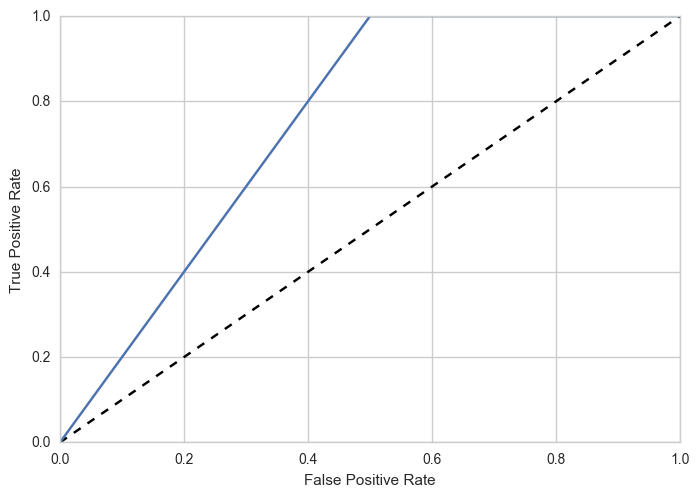

In [614]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')